# Một số bước xử lý cơ bản với âm thanh.

Trong bài học này, chúng ta sẽ tìm hiểu về cách đọc, biểu diễn và tương tác với âm thanh sử dụng các thư viện trong Python. <br> Trước tiên chúng ta hãy tìm hiểu về cấu tạo của âm thanh và các đặc trưng của âm thanh mà hệ thống thính giác của chúng ta thu nhận được.

## 1. Âm thanh và đặc trưng âm thanh

<u><b>Quá trình tai con người tiếp nhận âm thanh</b></u>: Đầu tiên âm thanh được tạo ra từ nguồn âm (ví dụ như màng loa) bằng cách tạo ra rụng động (màng loa rung) với các tần số khác nhau, áp lực từ các rung động với cường độ khác tác động lên khí và lan truyền đến tai người. Khi đến tai người, áp lực của không khí tác động vào mãng nhĩ làm màng nhĩ rung, sau đó các cơ quan khác của hệ thống thính giác tiếp nhận sự rung động từ màng nhĩ và truyền lên não bộ của con người. 

Các rung động được đặc trưng bởi hai yếu tố:
1. <b> Áp lực </b> (Sound Pressure Level): Màng loa được đẩy ra càng xa thì càng tạo nên áp lực lớn trong không khí.
2. <b> Tần số  </b> (Frequency): Số lần màng loa được kéo ra và kéo vào trong một khoảng thời gian đơn vị.
3. <b> Độ dài thời gian </b> (Duration): Rung động kéo dài trong bao lâu = Độ dài của đoạn âm thanh được phát qua loa.

3 yếu tố trên tương đương với <b> 3 đặc trưng cơ bản</b> mà tai người thường tiếp nhận khi nghe một đoạn âm thanh: 
1.  <b> Độ lớn </b> (Loundness)
2.  <b> Cao độ </b>  (Pitch)
3.  <b> Độ dài thời gian </b> (Duration) 

Để hiểu rõ hơn về các thông tin này, các bạn có thể tham khảo các nguồn sau: <br>
http://zone.ni.com/reference/en-XX/help/372416B-01/svtconcepts/human_perception_sound/ <br>
http://www.cafemuse.com/kitchen/perception/six_qualities.htm<br>
https://courses.lumenlearning.com/boundless-physics/chapter/sound-intensity-and-level/ <br>
http://soundking.vn/cau-tao-va-co-che-hoat-dong-cua-loa.html <br>
https://www.reddit.com/r/askscience/comments/2msrdn/how_does_a_speaker_produce_multiple_frequencies/ <br>
https://www.youtube.com/watch?v=0jyxhozq89g <br>

<u><b> Âm thanh trong máy tính: </b></u> Âm thanh khi đi vào micro được lấy mẫu với một tần số nhất định (ví dụ: 44100Hz - 44100 mẫu trên một giây) và số hóa bằng bộ DAC (Digital to Analog Converter). Khi lưu vào máy tính, một đoạn âm thanh tương đương với một dãy số $A = a_1, a_2, ...., a_n$, trong đó $a_i$ là biên độ của âm thanh tại lần lấy mẫu thứ $i$. 

<u> Lưu ý:</u> Để âm thanh sau khi lấy mẫu hồi phục được về dạng trước khi chưa lấy mẫu, thì tần số lấy mẫu phải lớn hơn hoặc bằng 2 lần tần số của âm thanh. 


## 2. Đọc và minh họa âm thanh sử dụng ngôn ngữ Python.

### 2.1 Đọc file wav sử dụng gói scipy và minh họa sửa dụng gói matplotlib

#### Import các thư viện:

In [120]:
import numpy as np
import scipy.io.wavfile as wav
from matplotlib import pyplot as plt

Để đọc một file âm thanh đuôi **wav** chúng ta sử dụng hàm [**scipy.io.wavfile.read("đường dẫn đén file wav")**](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.io.wavfile.read.html)

Hàm này sẽ trả về 2 giá trị, thứ nhất là tần số lấy mẫu, thứ 2 là một mảng data chứa biên độ tại các mẫu.

Để minh họa dữ liệu từ các mẫu, chúng ta có thể sự dùng hàm **matplotlib.pyplot.plot()** để vẽ biểu diễn sóng (waveform) của file âm thanh.


Đoạn code dưới đây đọc và minh họa các đoạn audio của các số  0 - 4.

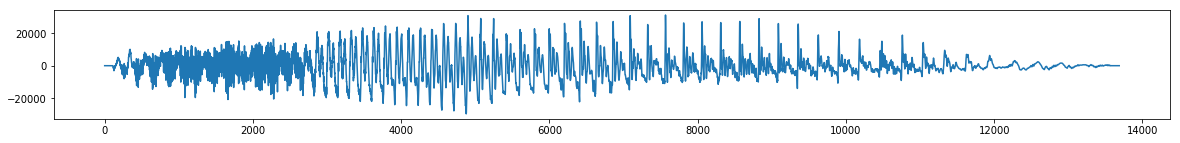

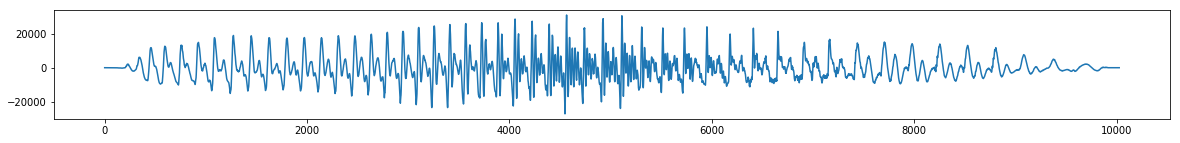

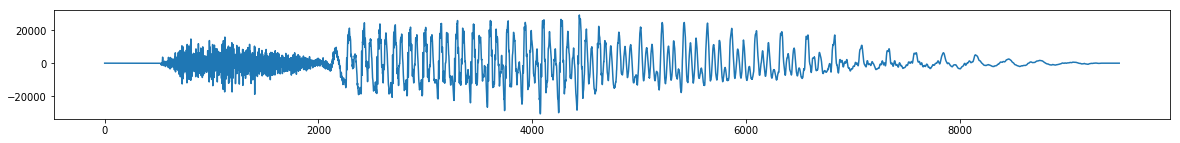

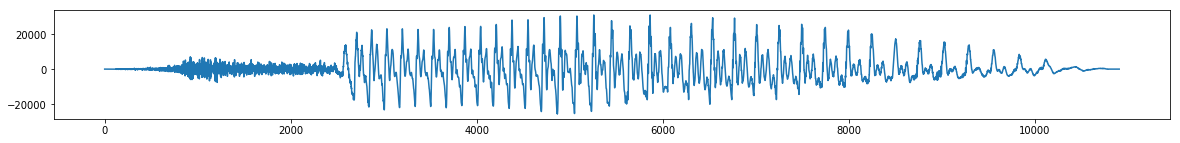

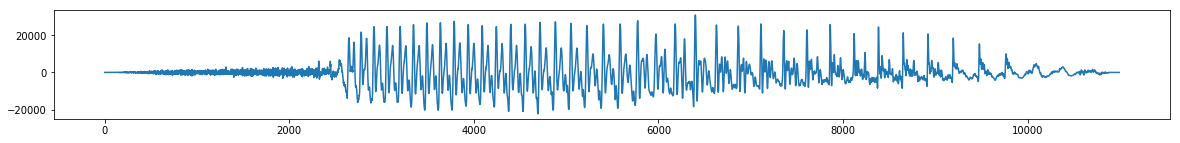

In [121]:
files = [ 'zero', 'one' , 'two', 'three', 'four']

for file in files:
    (rate,sig) = wav.read("audio/numbers/" + file + ".wav")
    plt.figure(figsize=(20,2))
    plt.plot(sig)
    plt.show()

Để phân tích chi tiết hơn, chúng ta hãy làm việc với file "'audio/numbers/one.wav"

In [122]:
sp, data = wav.read("audio/numbers/one.wav")

Hàm scipy.io.wavfile.read đọc file wav theo kiểu **int16** (cho file wav 16-bit) hay **int32** (cho file wav 32-bit), file wav 24-bit không được hỗ trợ. Chúng ta có thể kiểm tra file wav vừa đọc ở trên là 16-bit hay 32-bit như sau:

In [123]:
print(data.dtype)

int16


Chúng ta có thể thấy là file **one.wav** được lưu dưới dạng 16-bit. Điều này có nghĩa là biên độ tại mỗi mẫu được map vào khoảng $-2^{15}$ đến $2^{15}-1$.
Vì vậy, để thống nhất giữa các loại file wav 16-bit, 32-bit hay 24-bit, chúng ta nên scale giá trị biên độ về khoảng (-1, 1) trước khi tiến hành các bước xử lý tiếp theo.

In [124]:
data = data/(2.**15)

Tiếp theo chúng ta có thể kiểm tra file **one.wav** có bao nhiêu kênh (channel) bằng cách kiểm tra số chiều của dữ liệu (data).

In [125]:
print(data.shape)

(10027,)


Chữ số ở phía sau dấu phẩy chính là số chanels của file âm thanh, nếu nó được để trống hoặc bằng 1 thì có nghĩa là file đó chỉ có 1 chanel.

Tiếp, hãy xem xét tần số lấy mẫu  (sampling rate), tần số lấy mẫu là số mẫu được lưu lại trong 1 s. <br> 
Vậy, để tính thời gian của đoạn audio, ta chỉ việc lấy  số mẫu chia cho tần số lấy mẫu.

In [126]:
from __future__ import division
print("Sampling rate:", sp)
print("Duration:", len(data)/sp, "s")

('Sampling rate:', 22050)
('Duration:', 0.4547392290249433, 's')


### 2.2 Đọc file .wav sử dụng thư viện librosa

[**librosa**](https://librosa.github.io/librosa/) là một thư viện Python chuyên dùng để phân tích nhạc và âm thanh. Thư viện này cung cấp các hàm phổ biến để đọc, xử lý, biểu diễn hay trích chọn đặc trưng từ các file âm thanh.

Để cài đặt thư viện này, chúng ta có thể sự dụng chương trình quản lý gói của Python **pip** hoặc cài thông qua Anacoda. 

Để cài thông qua **pip**, từ Terminal, các bạn gõ:<br>
`pip install librosa`


Để cài thông qua Anacoda, các bạn sử dụng lệnh: <br>
`conda install -c conda-forge librosa`

Để đọc file âm thanh bằng thư gói **librosa**, chúng ta dùng hàm `librosa.load()` như dưới đây. Kết quả trả về cũng là dữ liệu âm thanh và tần số lấy mẫu nhưng hàm `scipy.io.wavfile.read()`

In [127]:
import librosa
x, sr = librosa.load('audio/numbers/one.wav')
print("Sampling rate",sr)

('Sampling rate', 22050)


Ở chế độ mặc định, **librosa** sẽ lấy mẫu lại(re-sample)tín hiệu âm thanh với tần số 22050Hz - 22050 mẫu trên một giây.

Bạn có thể thay đổi bằng cách truyền tần số lấy mẫu lại `sr` vào hàm `librosa.load()`: <br>
`librosa.load(audio_path, sr=44100)`

hoặc bỏ chế độ re-sampling bằng cách gán `None` cho tham số `sr`:<br>
`librosa.load(audio_path, sr=None)`

In [128]:
x, sr = librosa.load('audio/numbers/one.wav', sr =None)
print("Sampling rate",sr)

('Sampling rate', 22050)


Ở trên, chúng ta thấy rằng, tần số lấy mẫu vẫn giữ nguyên giá trị là $22050$ , điều này có nghĩa là tầm số lấy mẫu gốc của file `one.wav` là $22050$. 

***

Tiếp theo, chúng ta xem xét một số  cách để  view một file âm thanh.

In [1]:
%matplotlib inline
import seaborn # optional
import matplotlib.pyplot as plt
import librosa.display

Để vẽ biểu diễn dạng sóng của file âm thanh, chúng ta có thể sự dụng hàm `librosa.display.waveplot()`như bên dưới. 
Chúng ta có thể thấy rằng, biên độ (amplitute) của các mẫu trong file âm thanh đã được **librosa** chuẩn hóa về khoảng [-1,1] trước ghi vẽ biểu diễn sóng (waveform).

In [2]:
plt.figure(figsize=(15, 4))
librosa.display.waveplot(x, sr=sr)

NameError: name 'x' is not defined

Ngoài ra, như chúng ta đã biết rằng một đoạn âm thanh được tạo thành từ nhiều thành phần với tần số khác nhau. <br> Để phân tích các thành phần tần số trong một đoạn âm thanh, đầu tiền chúng ta phải dùng biến đổi Fourier để chuyển tín hiệu từ miền thời gian sang miền tần số sử dụng hàm `librosa.stft()`. 

Để trực quan hóa đóng góp của mỗi thành phần tần số trong đoạn âm thanh, các bạn có thể sử dụng hàm `librosa.display.specshow()` đễ vẽ phổ tần số của tín hiệu.

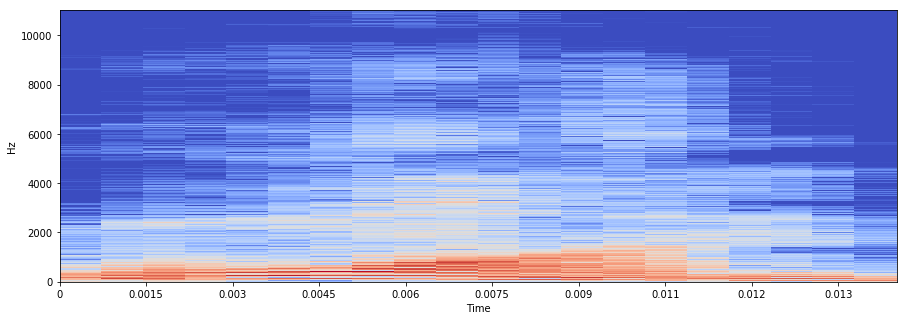

In [131]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(X)
plt.figure(figsize=(15, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz', hop_length = 16)

<u>Nhận xét</u>: Âm thanh từ file `one.wav` tập trung chủ yếu trong miền tần số 0 Hz - 1000 Hz ( vùng đỏ gách đậm ).   

Để chạy một đoạn âm thanh được lưu ở máy tính, chúng ta sử dụng hàm `IPython.display.Audio("path_to_audio_file")`

In [3]:
import IPython.display as ipd
ipd.Audio('audio/numbers/one.wav') # load a local WAV file

In [133]:
ipd.Audio(x, rate=sr) # load a NumPy array

### 3. Dùng pyaudio để record một đoạn âm thanh.

Để record một đoạn âm thanh, chúng ta có thể sử dụng thư viện [<b>`pyaudio`</b>](https://people.csail.mit.edu/hubert/pyaudio/). <br> **pyaudio** làm một Python wrapper của thư viện [**`PortAudio`**](http://www.portaudio.com/) được viết bằng C.
Để cài gói **pyaudio**, các bạn có thể sử dụng một trong 2 cách sau: <br>
`sudo apt-get install python-pyaudio python3-pyaudio`<br>
hoặc <br>
`pip install pyaudio`

Để ghi một đoạn âm thanh từ microphone, các bạn dùng đoạn code dưới đây :

In [1]:
import pyaudio
import wave

CHUNK = 1024
FORMAT = pyaudio.paInt16
CHANNELS = 2
RATE = 44100
RECORD_SECONDS = 5
WAVE_OUTPUT_FILENAME = "output.wav"
# 
p = pyaudio.PyAudio()

stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                frames_per_buffer=CHUNK)

print("* recording")

frames = []

for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK)
    frames.append(data)

print("* done recording")
stream.stop_stream()
stream.close()
p.terminate()
wf = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(RATE)
wf.writeframes(b''.join(frames))
wf.close()

* recording
* done recording


Để nghe lại đoạn audio vừa mới ghi, chúng ta có thể sử dụng hàm `IPython.display.Audio()`

In [4]:
ipd.Audio("output.wav")